# TSA Data

This is data published by the Department of Homeland Security of claims made against the Transportation Security Administration. It includes the airline of the passenger, airport, claim site, claim type, close amount, date of the incident and report, disposition, and type of claim and item. We are interested in data beginning in 2007 and ending in 2015. This report will outline the analysis procedure and explore the data to answer questions of interest.

We first begin by importing the requisite packages and libraries, and then reading in the data. The data are split over 4 excel files in both xlsx and xls formats. We will import them as pandas dataframes and append them together into one larger dataframe. Beforehand, the name of one column in one of the files was renamed to match with the others, though no other modifications to the raw data were made.

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import glob

In [6]:
directory = "data/"
data = pd.read_excel("data/claims-data-2015-as-of-feb-9-2016.xlsx")
for filename in glob.glob(directory + "*.xls"):
    data = data.append(pd.read_excel(filename))
data = data.iloc[:,[0,1,5,6,7,8,9,10,11]].reset_index()
del data['index']

Here are the first 5 rows of our dataframe. There are missing data present in some entries, which will be dealt with in the next step. Columns which were not required(such as airport name, which is redundant due to the airport code) were removed.

In [7]:
data.head()

,Airline Name,Airport Code,Claim Site,Claim Type,Close Amount,Date Received,Disposition,Incident Date,Item Category
0,Allegiant Air,ABE,Checkpoint,Property Damage,0,2015-05-28,Deny,2015-05-21 00:00:00,Personal Electronics
1,-,ABE,Checked Baggage,Property Damage,180,2015-08-21,Settle,2015-08-01 00:00:00,Sporting Equipment & Supplies
2,Allegiant Air,ABE,Checked Baggage,Passenger Property Loss,60,2015-10-07,Approve in Full,2015-10-02 00:00:00,Clothing
3,Allegiant Air,ABE,Checkpoint,Property Damage,-,2015-10-27,-,2015-10-19 00:00:00,Personal Accessories
4,American Airlines,ABI,Checked Baggage,Property Damage,0,2015-01-22,Deny,2014-12-23 00:00:00,Home Decor


We remove entries without an airline and without a disposition, and we will only focus on claims for property damage and passenger property loss, since they are the most common and most relevant to most passengers. Rows with NA values were removed as well. This does not imply that these data are not useful, and further analysis on missingness might yield insights. Our final dataset contains 82,589 claims.

In [35]:
data['Claim Type'].groupby(data['Claim Type']).count()

Claim Type
Passenger Property Loss    53220
Property Damage            29369
Name: Claim Type, dtype: int64

In [25]:
data = data[data["Disposition"] != '-']
data = data[data["Airline Name"] != '-']
data = data[(data['Claim Type']  =="Property Damage" ) | (data['Claim Type']  =="Passenger Property Loss" )].dropna()

In [26]:
data.shape

(82589, 9)

In [27]:
data.head()

,Airline Name,Airport Code,Claim Site,Claim Type,Close Amount,Date Received,Disposition,Incident Date,Item Category
0,Allegiant Air,ABE,Checkpoint,Property Damage,0,2015-05-28,Deny,2015-05-21 00:00:00,Personal Electronics
2,Allegiant Air,ABE,Checked Baggage,Passenger Property Loss,60,2015-10-07,Approve in Full,2015-10-02 00:00:00,Clothing
4,American Airlines,ABI,Checked Baggage,Property Damage,0,2015-01-22,Deny,2014-12-23 00:00:00,Home Decor
5,American Airlines,ABI,Checked Baggage,Passenger Property Loss,200,2015-08-05,Approve in Full,2015-07-14 00:00:00,Baggage/Cases/Purses
6,American Airlines,ABI,Checked Baggage,Passenger Property Loss,0,2015-09-07,Deny,2015-08-06 00:00:00,Personal Electronics


Raw Airline Counts

In [28]:
airlinecounts = pd.DataFrame({'count' : data['Airport Code'].groupby(data['Airport Code']).size()}).reset_index()

Joined with throughput data for Commercial Service Airports(from FAA)

In [29]:
throughput = pd.read_excel("cy15-commercial-service-enplanements.xlsx")
airlines = airlinecounts.merge(throughput, on ="Airport Code")
airlines.head()

,Airport Code,count,Rank,RO,ST,City,Airport Name,S/L,Hub,CY 15 Enplanements,CY 14 Enplanements,% Change
0,ABE,47,150,EA,PA,Allentown,Lehigh Valley International,P,N,320544,298306,0.0745
1,ABI,31,239,SW,TX,Abilene,Abilene Regional,P,N,86000,93656,-0.0817
2,ABQ,329,58,SW,NM,Albuquerque,Albuquerque International Sunport,P,M,2323883,2354184,-0.0129
3,ABR,13,320,GL,SD,Aberdeen,Aberdeen Regional,P,N,27595,26497,0.0414
4,ABY,16,305,SO,GA,Albany,Southwest Georgia Regional,P,N,33949,31260,0.0860


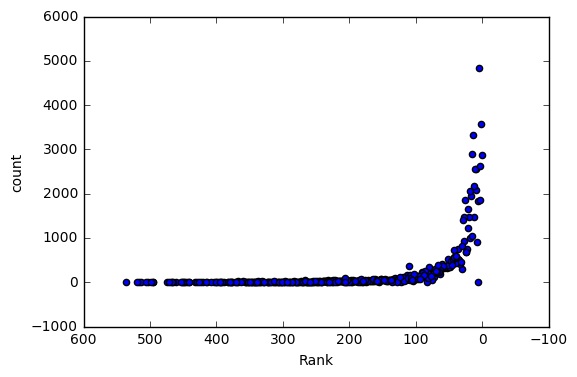

In [30]:
airlines.plot("Rank","count", kind = "scatter")
plt.gca().invert_xaxis()
plt.show()

Enplanements vs count

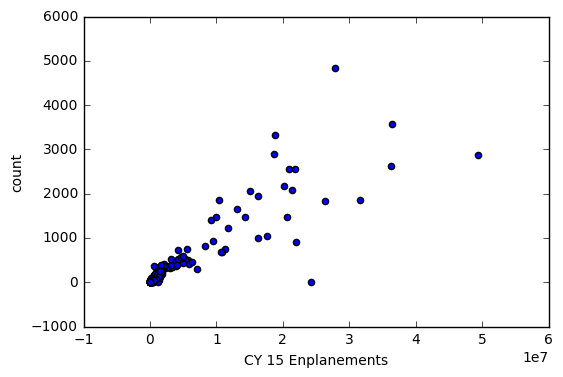

In [31]:
airlines.plot("CY 15 Enplanements","count", kind = "scatter")
plt.show()

In [32]:
airlines.sort_values("Rank")

,Airport Code,count,Rank,RO,ST,City,Airport Name,S/L,Hub,CY 15 Enplanements,CY 14 Enplanements,% Change
22,ATL,2873,1,SO,GA,Atlanta,Hartsfield - Jackson Atlanta International,P,L,49340732,46604273,0.0587
204,LAX,3583,2,WP,CA,Los Angeles,Los Angeles International,P,L,36351272,34314197,0.0594
266,ORD,2630,3,GL,IL,Chicago,Chicago O'Hare International,P,L,36305668,33843426,0.0728
95,DFW,1852,4,SW,TX,Fort Worth,Dallas-Fort Worth International,P,L,31589839,30804567,0.0255
193,JFK,4828,5,EA,NY,New York,John F Kennedy International,P,L,27782369,26244928,0.0586
94,DEN,1825,6,NM,CO,Denver,Denver International,P,L,26280043,26000591,0.0107
333,SFO,5,7,WP,CA,San Francisco International Airport,San Francisco International,P,L,24190560,22770783,0.0624
73,CLT,912,8,SO,NC,Charlotte,Charlotte/Douglas International,P,L,21913166,21537725,0.0174
202,LAS,2566,9,WP,NV,Las Vegas,McCarran International,P,L,21857693,20620248,0.0600
281,PHX,2074,10,WP,AZ,Phoenix,Phoenix Sky Harbor International,P,L,21351504,20344867,0.0495


In [33]:
data['Claim Type'].groupby(data['Claim Type']).count()

Claim Type
Passenger Property Loss    53220
Property Damage            29369
Name: Claim Type, dtype: int64

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82744 entries, 0 to 107031
Data columns (total 9 columns):
Airline Name     82744 non-null object
Airport Code     82744 non-null object
Claim Site       82744 non-null object
Claim Type       82744 non-null object
Close Amount     82744 non-null object
Date Received    82744 non-null datetime64[ns]
Disposition      82744 non-null object
Incident Date    82744 non-null object
Item Category    82744 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 6.3+ MB
